## Norwegian Protected Areas, Military Areas and Two Proposed Wind Farms

This data is from the Miljödirektoratet-Website where it can be viewed via MapViewer and then be downloaded.
<br>
First select: Naturvernområder, then below insert the requested area under "Definer område:"  *
"Egendefinert område (polygon)". Drag an area that encompasses the area of analysis and is slightly larger than it.
The bounds of the imported data have been manually selected in the MapViewer https://karteksport.miljodirektoratet.no/#page=tab1 to cover Southern Norway. 
Fill in your email and select Format: ESRI FileGeoDatabase EPSG:4326)
Alternatively, get the entire large dataset from https://kartkatalog.geonorge.no/metadata/5857ec0a-8d2c-4cd8-baa2-0dc54ae213b4.
<br>
The name in cell 2 must be changed accordingly.
<br>
<br> Norwegian Military areas download: https://kartkatalog.geonorge.no/metadata/forsvarets-skyte--og-oevingsfelt-i-sj/b7f89a26-75af-4ab8-9c78-8b232cfb4e5c
<br> The wind farm assessment areas can be downloaded here:  https://kartkatalog.geonorge.no/metadata/havvind/eebb5348-a2cf-44f2-a09f-7f715fcbdc08

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import geopandas as gpd
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import cartopy.crs as ccrs
from cartopy.crs import PlateCarree as plate
import cartopy.io.shapereader as shpreader

import xarray as xr
import atlite

import logging
import warnings

warnings.simplefilter('ignore')
logging.captureWarnings(False)
logging.basicConfig(level=logging.INFO)

import numpy as np
from shapely.geometry import Polygon


Change path according to received file.

In [2]:
marin= gpd.read_file(r"..\data\FME_5030656D_1677059304204_6536\Vern_EgnDef_4326_FILEGDB.gdb")
marin1= marin.copy()

vernplan apparently means level of protection. There are only 4 marineverneplan

In [3]:
marin1

,cddaId,datauttaksdato,faktaark,forvaltningsmyndighet,forvaltningsmyndighetType,forvaltningsmyndighetURL,forvaltningsplan,forvaltningsplanDato,førstegangVernet,identifikasjon_lokalId,...,skogvern,tiltaksbehov,truetVurdering,uuid,vernedato,verneform,verneformAggregert,verneforskrift,verneplan,geometry
0,555589640,None,https://faktaark.naturbase.no/?id=VV00003155,Statsforvalteren i Oslo og Viken,,None,ingenPlan,None,None,VV00003155,...,ja,ikkeBehov,ikkeTruet,2779c916-7db1-47e9-917e-668ac388d582,20150320000000,naturreservat,None,https://lovdata.no/forskrift/2015-03-20-232,skogvern,"MULTIPOLYGON (((10.36508 59.78912, 10.37236 59..."
1,155680,None,https://faktaark.naturbase.no/?id=VV00000825,Statsforvalteren i Rogaland,,None,ingenPlan,None,None,VV00000825,...,ja,ikkeVurdert,,ec0751b0-eb12-4275-9f61-e960512645f9,19841221000000,naturreservat,None,https://lovdata.no/forskrift/1984-12-21-2207,verneplanLøvskog,"MULTIPOLYGON (((6.53996 58.42186, 6.53824 58.4..."
2,155566,None,https://faktaark.naturbase.no/?id=VV00001473,Hægebostad kommune,kommune,None,ingenPlan,None,None,VV00001473,...,ja,behov,truet,194a86fd-3b8f-4dd3-96c7-c0c17bcc0c3e,19781222000000,naturreservat,None,https://lovdata.no/forskrift/1978-12-22-43,verneplanLøvskog,"MULTIPOLYGON (((7.19957 58.48897, 7.19913 58.4..."
3,555692032,None,https://faktaark.naturbase.no/?id=VV00003508,Statsforvalteren i Oslo og Viken,,None,ikkeVurdert,None,20190621000000,VV00003508,...,ja,ikkeVurdert,ikkeVurdert,3815fca3-41ea-4f6c-9d6d-9d15edef07c0,20200623000000,naturreservat,None,https://lovdata.no/forskrift/2020-06-23-1312,skogvern,"MULTIPOLYGON (((11.11910 59.38711, 11.11936 59..."
4,156300,None,https://faktaark.naturbase.no/?id=VV00001465,Vernområdestyret for Oksøy-Ryvingen og Flekkef...,verneområdestyre,None,revideres,None,None,VV00001465,...,ja,ikkeVurdert,truet,d8743985-39a1-45b4-8b42-543b269f72ba,19800328000000,naturreservat,None,https://lovdata.no/forskrift/1980-03-28-69,verneplanSjøfugl,"MULTIPOLYGON (((7.54836 57.96659, 7.54906 57.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,555560039,None,https://faktaark.naturbase.no/?id=VV00003065,Statsforvalteren i Innlandet,,None,godkjent,20190624000000,None,VV00003065,...,ja,,ikkeTruet,7ffe7d7e-c35b-46ac-af3b-0f5ff2fa9322,20130125000000,naturreservat,None,https://lovdata.no/forskrift/2013-01-25-93,skogvern,"MULTIPOLYGON (((11.17266 61.09239, 11.17267 61..."
2022,182932,None,https://faktaark.naturbase.no/?id=VV00000886,Stavanger kommune,kommune,None,godkjent,None,None,VV00000886,...,ja,behov,truet,e946b908-ef1c-4a0d-b916-d121ebf6661b,20041126000000,naturreservat,None,https://lovdata.no/forskrift/2004-11-26-1517,annetVern,"MULTIPOLYGON (((5.80838 59.23119, 5.80783 59.2..."
2023,555692037,None,https://faktaark.naturbase.no/?id=VV00003521,Statsforvalteren i Agder,,None,ingenPlan,None,None,VV00003521,...,ja,behov,ikkeTruet,d017fcd6-9942-4fb4-9540-57d773c56458,20190621000000,naturreservat,None,https://lovdata.no/forskrift/2019-06-21-822,skogvern,"MULTIPOLYGON (((7.93262 58.32599, 7.93299 58.3..."
2024,None,None,https://faktaark.naturbase.no/?id=VV00003792,Statsforvalteren i Agder,,None,ingenPlan,None,None,VV00003792,...,ja,ikkeVurdert,ikkeTruet,57435bdb-a322-42b6-8414-7f1cd14232a6,20221216000000,naturreservat,None,https://lovdata.no/forskrift/2022-12-16-2555,skogvern,"MULTIPOLYGON (((7.74822 58.15292, 7.74843 58.1..."


In [4]:
marin1.info()
marin1['verneplan'].unique()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   cddaId                     1997 non-null   object  
 1   datauttaksdato             0 non-null      object  
 2   faktaark                   2026 non-null   object  
 3   forvaltningsmyndighet      2014 non-null   object  
 4   forvaltningsmyndighetType  2026 non-null   object  
 5   forvaltningsmyndighetURL   0 non-null      object  
 6   forvaltningsplan           2026 non-null   object  
 7   forvaltningsplanDato       313 non-null    object  
 8   førstegangVernet           186 non-null    object  
 9   identifikasjon_lokalId     2026 non-null   object  
 10  identifikasjon_navnerom    2026 non-null   object  
 11  identifikasjon_versjonId   0 non-null      object  
 12  iucn                       2026 non-null   object  
 13  kommune                  

array(['skogvern', 'verneplanLøvskog', 'verneplanSjøfugl',
       'verneplanVåtmark', 'annetVern', 'verneplanNasjonalpark',
       'ikkeVurdert', 'verneplanMyr', 'marinVerneplan', 'kvartærgeologi'],
      dtype=object)

In [5]:
marin1.crs
marin1['verneplan'].unique()


array(['skogvern', 'verneplanLøvskog', 'verneplanSjøfugl',
       'verneplanVåtmark', 'annetVern', 'verneplanNasjonalpark',
       'ikkeVurdert', 'verneplanMyr', 'marinVerneplan', 'kvartærgeologi'],
      dtype=object)

<br>
The bounds of the data selection are now set to the delimitations of the cutout:<br>


In [6]:
limits= np.array([-4.375, 51.375, 10.125, 60.875])
xmin, xmax= (-4.375, 10.125)
ymin, ymax= (51.375, 60.875)
lat_point_list = [ymin, ymax, ymax,ymin,ymin]
lon_point_list = [xmin, xmin ,xmax ,xmax, xmin ]
original_polygon = Polygon(zip(lon_point_list, lat_point_list))
polygon = Polygon([original_polygon.boundary.interpolate(i, normalized=True) for i in np.linspace(0, 1, 10000)])
poly = gpd.GeoDataFrame(['Selection'], geometry=[polygon], crs=4326)
#poly.iloc[0].geometry.wkt



<AxesSubplot:>

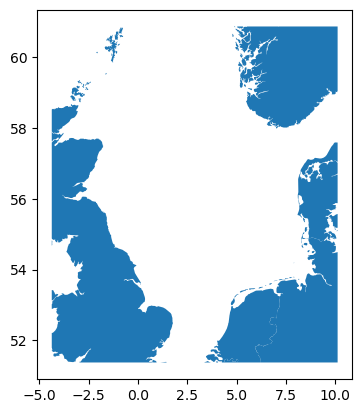

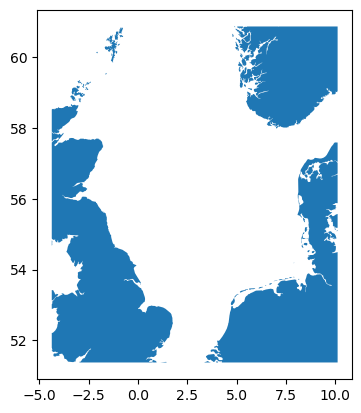

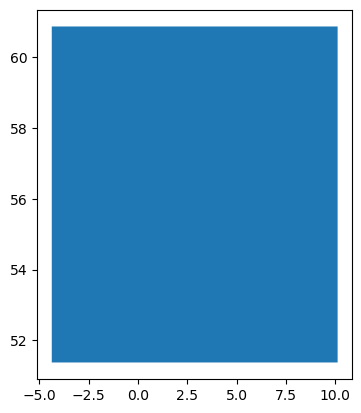

In [7]:
#hier Reduktion auf den Cutout-Ausschnitt mittels helper

shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

BorderingStates_init = gpd.GeoSeries({r.attributes['NAME_EN']: r.geometry
                      for r in reader.records()},
                     crs={'init': 'epsg:4326'}
                     ).reindex(['United Kingdom', 'Denmark','Germany','Norway','France','Netherlands','Belgium']) 

helper = gpd.GeoDataFrame(geometry=BorderingStates_init.geometry)#.reset_index().rename(columns={'index':'Countries'})#so kommt man zu Index
helper=helper.to_crs(4326) #komischerweise lässt sich das crs oben nicht übergeben
helper= helper.clip(poly)
helper.plot()
inland= helper.dissolve() #dissolve works only with GPDFs, unary_union returns a Multiploygon#coast0
inland.plot()

poly.plot()
#poly.iloc[0].geometry.wkt ist sehr lang



In [8]:
# das EPSG der Daten ist 32633

marin2= marin1.clip(poly)
marin3 = marin2.overlay(inland, how='difference')


Clip has no effect since the polygon is larger than the provided data

(56.0, 62.62114479030008)

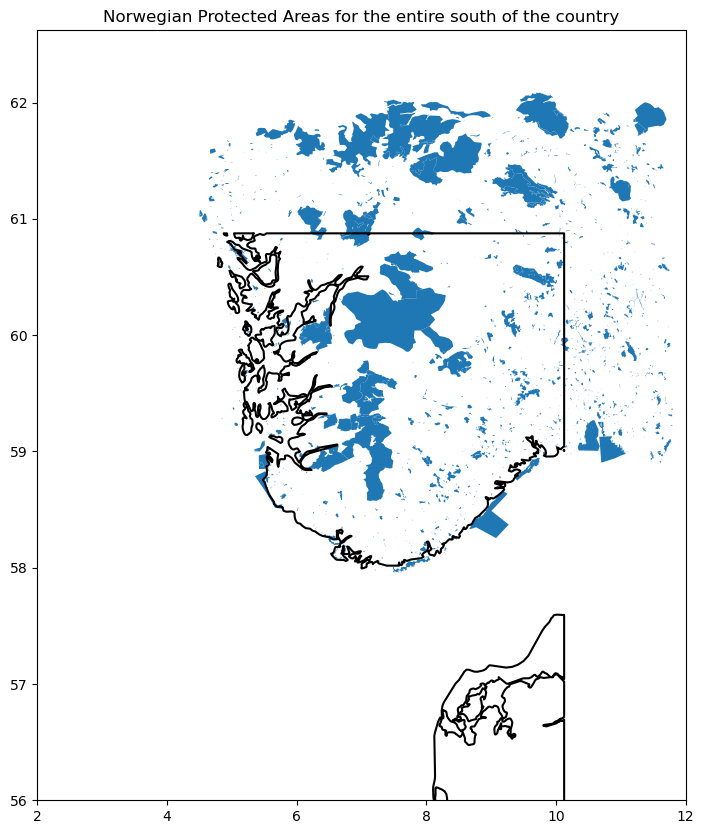

In [9]:
fig, ax =plt.subplots(1,1,figsize=(10,10))
marin1.plot(markersize=0.5,ax=ax)
#helper2 = gpd.GeoDataFrame(geometry=BorderingStates_init[3:7].geometry)
#helper2.plot(ax=ax,color='green')
ax.set_title("Norwegian Protected Areas for the entire south of the country")
helper.boundary.plot(ax=ax,color='black')
# otuher borders in the cutout are show,so: limit the axis
ax.set_xlim(2,12)
ax.set_ylim(56)
#

(56.0, 61.35)

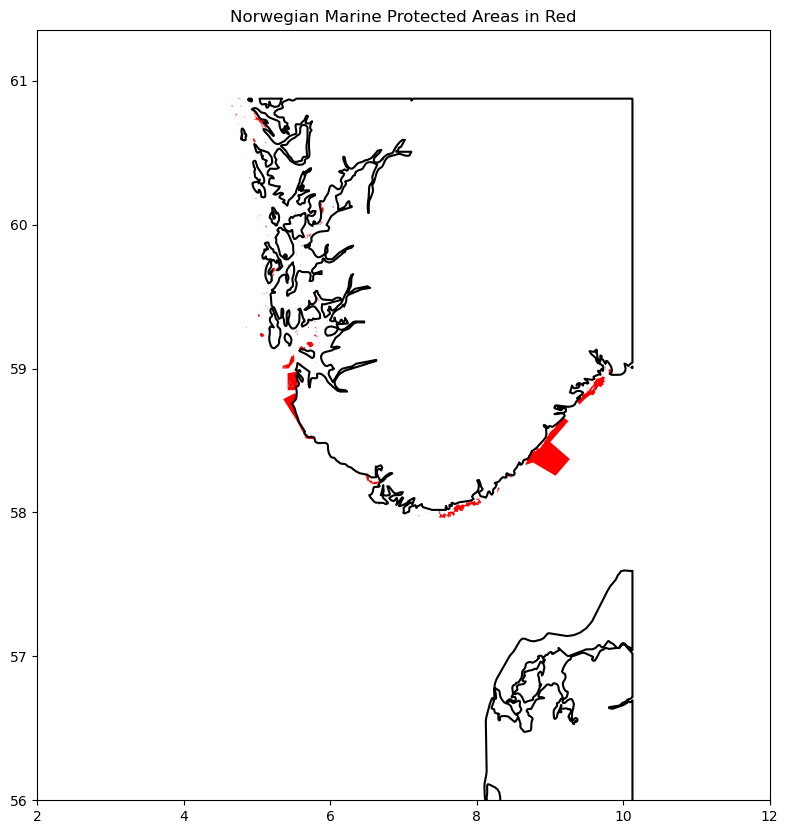

In [10]:
fig, ax =plt.subplots(1,1,figsize=(10,10))
ax.set_title("Norwegian Marine Protected Areas in Red")
#marin2.plot(ax=ax)
inland.boundary.plot(color='black',ax=ax)
marin3.plot(ax=ax,color='red',zorder=1)
#marin4.plot(ax=ax,color='yellow')
ax.set_xlim(2,12)
ax.set_ylim(56)

In [11]:
marin3.columns

Index(['cddaId', 'datauttaksdato', 'faktaark', 'forvaltningsmyndighet',
       'forvaltningsmyndighetType', 'forvaltningsmyndighetURL',
       'forvaltningsplan', 'forvaltningsplanDato', 'førstegangVernet',
       'identifikasjon_lokalId', 'identifikasjon_navnerom',
       'identifikasjon_versjonId', 'iucn', 'kommune', 'majorEcosystemType',
       'marinBeskyttelse', 'marineAreaPercentage', 'navn', 'offisieltNavn',
       'planbehov', 'revisjon', 'skjøtselplan', 'skjøtselplanDato', 'skogvern',
       'tiltaksbehov', 'truetVurdering', 'uuid', 'vernedato', 'verneform',
       'verneformAggregert', 'verneforskrift', 'verneplan', 'geometry'],
      dtype='object')

In [12]:
marin3['TYPE']='MPA_NOR'

In [13]:
marin3.to_file(filename=r"..\data\protected_areas_shapefiles\protected_areas_NOR.gpkg", driver='GPKG')  

## Military areas

In [34]:
military =gpd.read_file(r"..\data\Forurensning_0000_Norge_4326_SkyteOvingsfeltSjo_FGDB.gdb")
mil= military.copy()

<AxesSubplot:>

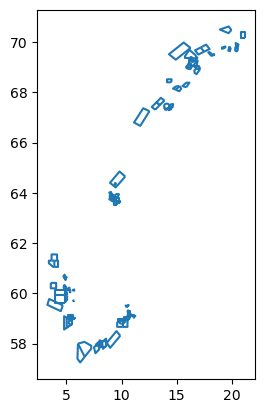

In [35]:
mil.plot()

In [36]:
from shapely.ops import polygonize
mil.geometry = gpd.GeoSeries(polygonize(mil.geometry))
#convex_hull produces strange results

In [37]:
mil.head()

,objid,objtype,SHAPE_Length,geometry
0,1,Skytefeltgrense,0.897557,"POLYGON ((9.63550 63.82840, 9.58323 63.83225, ..."
1,2,Skytefeltgrense,0.758450,"POLYGON ((9.44500 63.71000, 9.34667 63.70500, ..."
2,3,Skytefeltgrense,0.957886,"POLYGON ((4.99000 60.14700, 5.18300 60.18800, ..."
3,4,Skytefeltgrense,0.244171,"POLYGON ((5.06667 60.61667, 4.95000 60.61667, ..."
4,5,Skytefeltgrense,0.266045,"POLYGON ((10.47422 59.45495, 10.46841 59.45602..."


In [38]:
mil.to_file(filename=r"..\data\military_areas_NOR\military_areas_NOR.gpkg", driver='GPKG')  

Getting Utsira Nord und Sjoglige Nord Se Wind Farms

In [39]:
two_windfarms= gpd.read_file(r"..\data\eebb5348-a2cf-44f2-a09f-7f715fcbdc08")
two_wf= two_windfarms.copy()

In [40]:
two_wf

,OBJECTID,IDENT,NAVN,TYPEANLEGG,AREAL,AREAL_DYB,MINDYBDE,MAXDYBDE,GJDYBDE,MINVIND,...,MAXVINDPRO,GJVINDPROD,ID,SORT,URL,OMRAADEKAR,OMRADEANBE,SHAPE_STAr,SHAPE_STLe,geometry
0,1,Nordsjøen 2,Frøyagrunnene,Bunnfast,58.057942,35.91,-69.977264,-5.779030,-33.134323,9.80,...,0.4420,0.430715,1,4,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne nå,5.805794e+07,30570.564921,"POLYGON ((-39539.579 6885403.260, -47644.078 6..."
1,2,Nordsjøen 3,Olderveggen,Bunnfast,76.461235,62.78,-69.987160,-6.210636,-43.021969,9.51,...,0.4335,0.413961,2,5,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne senere,7.646124e+07,36289.116088,"POLYGON ((-35020.004 6902171.539, -39081.071 6..."
2,3,Norskehavet 3,Nordøyan - Ytre Vikna,Bunnfast,139.894201,98.97,-69.992264,-5.093023,-36.622326,8.98,...,0.3910,0.385068,3,8,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne senere,1.398942e+08,58170.107942,"POLYGON ((281462.453 7193746.669, 286980.467 7..."
3,4,Norskehavet 6,Gimsøy nord,Bunnfast,245.107703,219.47,-70.000000,-5.000329,-29.000000,7.47,...,0.3485,0.338613,4,11,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Ikke åpne,2.451077e+08,64386.760444,"POLYGON ((457995.678 7582787.328, 457995.678 7..."
4,5,Norskehavet 7,Nordmela,Bunnfast,331.999548,281.33,-65.000000,-5.000000,-49.450000,7.65,...,0.3570,0.348474,5,12,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Ikke åpne,3.319995e+08,76990.357518,"POLYGON ((504129.968 7672038.707, 506636.795 7..."
5,6,Norskehavet 9,Auvær,Bunnfast,105.147676,83.98,-69.996887,-5.012301,-33.114853,7.78,...,0.3485,0.341052,6,13,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne senere,1.051477e+08,41726.291820,"POLYGON ((623543.647 7769149.080, 628099.379 7..."
6,7,Nordsjøen 1,Sørlige Nordsjø II,Bunnfast,2590.540237,2590.00,-69.572456,-53.100048,-59.609993,10.05,...,0.4675,0.459584,7,2,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Langt til havs,Åpne nå,2.590540e+09,205189.372959,"POLYGON ((-94670.941 6370715.328, -80344.492 6..."
7,8,Barentshavet 1,Sandskallen - Sørøya nord,Bunnfast,260.264769,126.97,-69.998878,-22.516758,-54.369774,8.73,...,0.3825,0.379218,8,15,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne nå,2.602648e+08,68876.685076,"POLYGON ((762084.539 7884007.022, 778761.471 7..."
8,9,Nordsjøen 0,Sørlige Nordsjø I,Bunnfast,1375.186327,1262.29,-70.000000,-50.041981,-64.045128,10.11,...,0.4675,0.462459,9,1,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Langt til havs,Åpne nå,1.375186e+09,159805.729212,"POLYGON ((-160349.286 6436969.799, -158583.765..."
9,10,Norskehavet 4-5,Trænafjorden - Selvær,Bunnfast,196.683942,100.69,-69.991257,-5.000727,-32.439629,9.18,...,0.3910,0.390573,10,10,http://www.nve.no/no/Havvind/Havvind-forslag-t...,Grunt vann / Nær land,Åpne senere,1.966839e+08,82296.778818,"MULTIPOLYGON (((384678.476 7375872.256, 369746..."


In [41]:
t= two_wf[two_wf["NAVN"].isin(["Utsira nord", "Sørlige Nordsjø II"])]

In [42]:
t= t.to_crs(4326)

No clipping necessary

<AxesSubplot:>

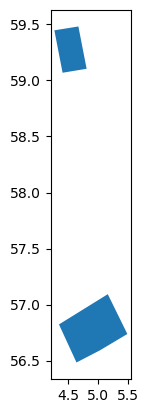

In [46]:
t.plot()

In [47]:
t.to_file(filename=r"..\data\Windfarm_Shapefiles_Norway\two_windfarms.gpkg", driver='GPKG')  

## 